In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#mlat = np.arange(50, 89, 1) #30 intervals between 53.1° to 89.7°
#mlt= np.arange(1, 360, 1) #80 intervals between 1.6° to 357.6°

#AMPERE
#mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

#mlat = np.linspace(0,90,30) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360,80) #24 intervals between 0° to 360°

In [27]:
def calculate_delta(lat1, lon1, lat2, lon2):
    radius = 6371.008

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    l = 2 * np.pi * radius
    
    delta_x = dlat * (l/360)
    delta_y = dlon * (l/360) * np.cos(np.radians(lat2))
    
    return delta_x, delta_y



In [16]:
lats = np.linspace(53.1, 89.9, 30)
x = []
y = []
for i in range(len(lats)-1):

    delta_x, delta_y = calculate_delta(lats[i], 0, lats[i+1], 1)
    x.append(delta_x)
    y.append(delta_y)

print(y)


[64.77816518910852, 62.76079011736298, 60.71263104729603, 58.63469259540878, 56.52799398490886, 54.39356854578408, 52.232463207956975, 50.045737987768476, 47.83446546804265, 45.59973027198786, 43.342628531191956, 41.06426734797259, 38.76576425234667, 36.448246653884844, 34.11285128872004, 31.760723661981608, 29.3930174859281, 27.010894114054494, 24.61552197145137, 22.20807598169573, 19.789736990553948, 17.36169118678028, 14.925129520294382, 12.481247118023607, 10.031242697696488, 7.576317979874844, 5.117677098513237, 2.65652601033433, 0.1940719033105368]


In [40]:
mlat = np.arange(0.1,89.9,1)
mlon = np.arange(0.1,359.9,1)
areas = np.zeros((89, 359))
# Loop through latitude and longitude pairs to calculate areas
for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

#divide area values by 1e3
#areas = areas / 1e6
areas

array([[55707.52965266, 55707.52965266, 55707.52965266, ...,
            0.        ,     0.        ,     0.        ],
       [55680.37734778, 55680.37734778, 55680.37734778, ...,
            0.        ,     0.        ,     0.        ],
       [55636.26426056, 55636.26426056, 55636.26426056, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [ 2818.92720365,  2818.92720365,  2818.92720365, ...,
            0.        ,     0.        ,     0.        ],
       [ 1847.33352439,  1847.33352439,  1847.33352439, ...,
            0.        ,     0.        ,     0.        ],
       [  875.17712945,   875.17712945,   875.17712945, ...,
            0.        ,     0.        ,     0.        ]])

In [41]:
fig, ax = plt.subplots(figsize=(24, 9))
sns.heatmap(areas, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Area (m^2)'}, fmt='.0f', annot=True)
#set y ticks labels to be from 90 down to 40
#ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fc0835c59d0> (for post_execute):


KeyboardInterrupt: 

In [42]:
def weighted_loss(prediction, target, weights):
    loss = prediction - target #MAE
    weights = weights / 1e6
    weighted_loss = loss * weights
    
    return weighted_loss

target = np.ones((29, 79))
#target = np.ones((88, 359))
prediction = target + 0.1
weights = areas
weights = np.flipud(weights)

weight_loss = weighted_loss(prediction, target, weights)
#fig, ax = plt.subplots(figsize=(24, 9))
#sns.heatmap(weight_loss, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Loss (MSE)'}, fmt='.0f', annot=True)
#ax.set_yticklabels(np.flip(np.arange(53, 89, 1)))
weight_loss

ValueError: operands could not be broadcast together with shapes (29,79) (89,359) 

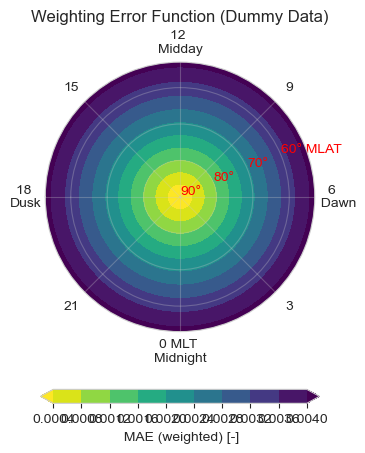

In [32]:
# Define common parameters
theta = np.linspace(0, 360, 79) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(53.1, 89.7, 29)
shrink = .6

# Plot true values
abs_error = weight_loss
abs_error = np.flipud(abs_error) # flip the array upside down

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,5))

c_true = ax.contourf(theta_rad, r, abs_error,  cmap='viridis_r', extend='both', levels=10, zorder=0)
ax.set_ylim([0, 37])
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["90°", "80°", "70°", "60° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
ax.set_title(f'Weighting Error Function (Dummy Data)')
plt.colorbar(c_true, ax=ax, label=' MAE (weighted) [-]', shrink=shrink, pad=0.15, orientation='horizontal')
ax.grid(True, linestyle='-', alpha=0.3)
#plt.tight_layout()
#plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/weighted_MAE_REPU.png', dpi=400, bbox_inches='tight')

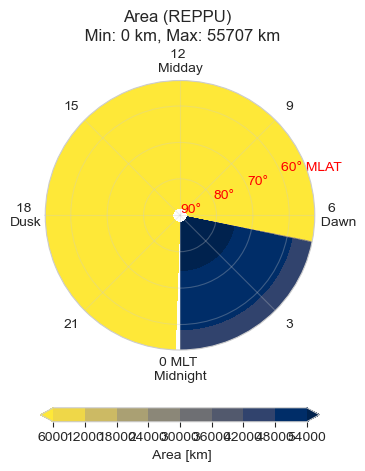

In [47]:
# Define common parameters
#theta = np.linspace(0.1, 360, 79) - 90
#theta_rad = theta / 360 * 2 * np.pi
#r = 90 - np.linspace(53.1, 89.7, 29)
#shrink = .7

theta = np.arange(0,359,1) - 90
theta_rad =theta / 360 * 2 * np.pi
r = 90 - np.arange(0, 89, 1)
shrink = .6

# Plot true values
abs_error = areas  #into km
abs_error = np.flipud(abs_error) # flip the array upside down

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 5))

c_true = ax.contourf(theta_rad, r, abs_error, cmap='cividis_r', extend='both', levels=10, zorder=0)
ax.set_ylim([0, 37])
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["90°", "80°", "70°", "60° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
a_min = int(areas.min())
a_max =  int(areas.max())
ax.set_title(f'Area (REPPU) \n Min: {a_min} km, Max: {a_max} km', linespacing=1.3)
plt.colorbar(c_true, ax=ax, label=' Area [km]', shrink=shrink, pad=0.15, orientation='horizontal')
ax.grid(True, linestyle='-', alpha=0.3)
#plt.tight_layout()
#plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/Area_REPU.png',
#            dpi=400, bbox_inches='tight')

In [ ]:
areas.min()/1000, areas.max()/1000
